In [25]:
from keras.datasets import fashion_mnist
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical, to_ordinal
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np

# from __future__ import absolute_import,division, print_function, unicode_literals

tf.random.set_seed(5)
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score

print(tf.__version__)

2.12.1


In [24]:
%load_ext tensorboard

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормализация
train_images = (train_images / 255)
test_images = (test_images / 255)

# Сглаживание (расправление) 
X_train_images = train_images.reshape((-1, 784))
X_test_images = test_images.reshape((-1, 784))

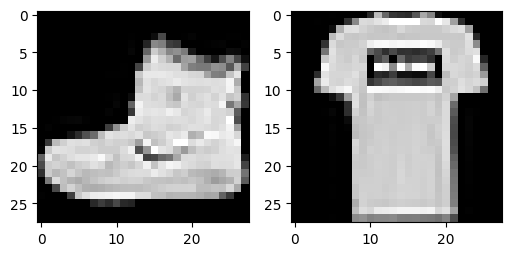

In [7]:
# визуализируем изображения
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(train_images[1], cmap='gray')

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# rm -rf ./logs/  # удаляем папку logs

Определение слоев

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    # кол-во нейронов выходного слоя равно количеству классов
    keras.layers.Dense(10, name='output')
])
config = model.get_config()
model.save_weights('fashion_weights.h5')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hiden_one (Dense)           (None, 256)               200960    
                                                                 
 hiden_two (Dense)           (None, 128)               32896     
                                                                 
 hiden_three (Dense)         (None, 64)                8256      
                                                                 
 hiden_four (Dense)          (None, 64)                4160      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 246,922
Trainable params: 246,922
Non-trai

Epoch 1/25
240/240 [==============================] - 3s 9ms/step - loss: 0.5836 - accuracy: 0.7957
Epoch 2/25
240/240 [==============================] - 2s 8ms/step - loss: 0.3748 - accuracy: 0.8647
Epoch 3/25
240/240 [==============================] - 2s 9ms/step - loss: 0.3311 - accuracy: 0.8788
Epoch 4/25
240/240 [==============================] - 2s 8ms/step - loss: 0.3052 - accuracy: 0.8863
Epoch 5/25
240/240 [==============================] - 2s 9ms/step - loss: 0.2872 - accuracy: 0.8925
Epoch 6/25
240/240 [==============================] - 3s 11ms/step - loss: 0.2689 - accuracy: 0.9009
Epoch 7/25
240/240 [==============================] - 2s 10ms/step - loss: 0.2585 - accuracy: 0.9027
Epoch 8/25
240/240 [==============================] - 2s 10ms/step - loss: 0.2473 - accuracy: 0.9077
Epoch 9/25
240/240 [==============================] - 2s 10ms/step - loss: 0.2398 - accuracy: 0.9099
Epoch 10/25
240/240 [==============================] - 2s 10ms/step - loss: 0.2253 - accuracy: 0

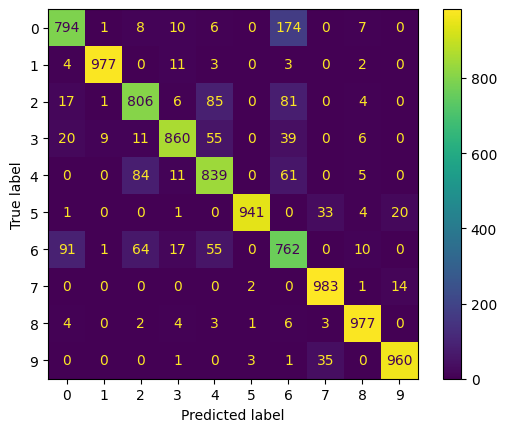

In [19]:
import os, datetime

model = model.from_config(config)
model.load_weights('fashion_weights.h5')

# root_logdir = os.path.join(os.curdir, "MNIST_logs")
# def get_run_logdir():
#     run_id = time.strftime("run_%H%M%S_%Y%m%d")
#     return os.path.join(root_logdir, run_id)
# run_logdir = get_run_logdir()

log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
# визуализация результатов
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# обучение остановится если в течении т рех эпох метрика loss не будет снижаться
es_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size = 250, epochs=25, verbose=1, callbacks=[tensorboard_cb, es_callback])
  # model.fit(train_images, train_labels, batch_size = 250, epochs=el, verbose=0, validation_data=(test_images, test_labels))
  # model.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0, validation_data=(test_images, test_labels), callbacks=[reduce_lr])
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)



In [20]:
def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred, labels=labels, average=None)
  recall = recall_score(y_true, y_pred, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

In [22]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.853, полнота - 0.794
Класс - 1, точность - 0.988, полнота - 0.977
Класс - 2, точность - 0.827, полнота - 0.806
Класс - 3, точность - 0.934, полнота - 0.860
Класс - 4, точность - 0.802, полнота - 0.839
Класс - 5, точность - 0.994, полнота - 0.941
Класс - 6, точность - 0.676, полнота - 0.762
Класс - 7, точность - 0.933, полнота - 0.983
Класс - 8, точность - 0.962, полнота - 0.977
Класс - 9, точность - 0.966, полнота - 0.960


Модель показала точность в 88,99%. Наихудший показатель у определения 6 класса

In [ ]:
%tensorboard --logdir logs/fit

In [30]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])

In [32]:
# keras.utils.plot_model(model1, show_shapes=True)

In [33]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hiden_one (Dense)           (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 hiden_two (Dense)           (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 hiden_three (Dense)         (None, 64)                8256      
                                                                 
 hiden_four (Dense)          (None, 64)               

Epoch 1/25
240/240 [==============================] - 4s 11ms/step - loss: 0.6884 - accuracy: 0.7555
Epoch 2/25
240/240 [==============================] - 2s 10ms/step - loss: 0.4402 - accuracy: 0.8394
Epoch 3/25
240/240 [==============================] - 2s 10ms/step - loss: 0.3915 - accuracy: 0.8574
Epoch 4/25
240/240 [==============================] - 2s 10ms/step - loss: 0.3728 - accuracy: 0.8645
Epoch 5/25
240/240 [==============================] - 2s 10ms/step - loss: 0.3536 - accuracy: 0.8701
Epoch 6/25
240/240 [==============================] - 3s 11ms/step - loss: 0.3437 - accuracy: 0.8741
Epoch 7/25
240/240 [==============================] - 3s 11ms/step - loss: 0.3339 - accuracy: 0.8784
Epoch 8/25
240/240 [==============================] - 3s 11ms/step - loss: 0.3226 - accuracy: 0.8816
Epoch 9/25
240/240 [==============================] - 2s 10ms/step - loss: 0.3158 - accuracy: 0.8837
Epoch 10/25
240/240 [==============================] - 3s 11ms/step - loss: 0.3081 - accura

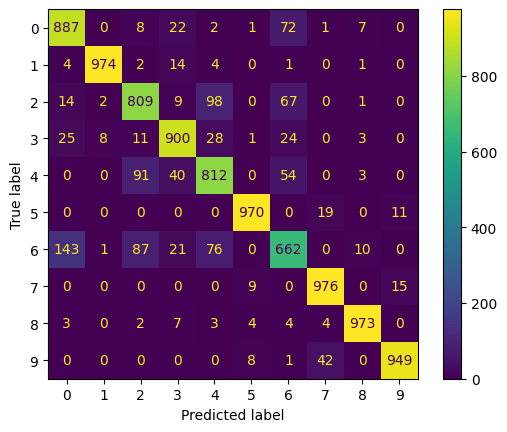

In [34]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model1.fit(train_images, train_labels, batch_size = 250, epochs=25, verbose=1, callbacks=[tensorboard_cb, es_callback])
  # model.fit(train_images, train_labels, batch_size = 250, epochs=el, verbose=0, validation_data=(test_images, test_labels))
  # model.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0, validation_data=(test_images, test_labels), callbacks=[reduce_lr])
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model1,
                                         tf.keras.layers.Softmax()])
predictions1 = probability_model.predict(test_images)
y_pred1 = np.argmax(predictions1, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred1)

In [35]:
def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred, labels=labels, average=None)
  recall = recall_score(y_true, y_pred, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

In [39]:
recall_precision(test_labels, y_pred1)

Класс - 0, точность - 0.824, полнота - 0.887
Класс - 1, точность - 0.989, полнота - 0.974
Класс - 2, точность - 0.801, полнота - 0.809
Класс - 3, точность - 0.888, полнота - 0.900
Класс - 4, точность - 0.794, полнота - 0.812
Класс - 5, точность - 0.977, полнота - 0.970
Класс - 6, точность - 0.748, полнота - 0.662
Класс - 7, точность - 0.937, полнота - 0.976
Класс - 8, точность - 0.975, полнота - 0.973
Класс - 9, точность - 0.973, полнота - 0.949


Точность модели немного улучшилась до 89,12%, но также проседает 6 класс (хотя его значения немного увеличились)

Epoch 1/25
240/240 [==============================] - 3s 8ms/step - loss: 0.5774 - accuracy: 0.7984
Epoch 2/25
240/240 [==============================] - 2s 9ms/step - loss: 0.3722 - accuracy: 0.8652
Epoch 3/25
240/240 [==============================] - 2s 8ms/step - loss: 0.3278 - accuracy: 0.8798
Epoch 4/25
240/240 [==============================] - 2s 8ms/step - loss: 0.3068 - accuracy: 0.8869
Epoch 5/25
240/240 [==============================] - 2s 8ms/step - loss: 0.2877 - accuracy: 0.8945
Epoch 6/25
240/240 [==============================] - 2s 7ms/step - loss: 0.2718 - accuracy: 0.8996
Epoch 7/25
240/240 [==============================] - 2s 8ms/step - loss: 0.2584 - accuracy: 0.9032
Epoch 8/25
240/240 [==============================] - 2s 8ms/step - loss: 0.2465 - accuracy: 0.9078
Epoch 9/25
240/240 [==============================] - 2s 8ms/step - loss: 0.2394 - accuracy: 0.9114
Epoch 10/25
240/240 [==============================] - 2s 9ms/step - loss: 0.2274 - accuracy: 0.9155

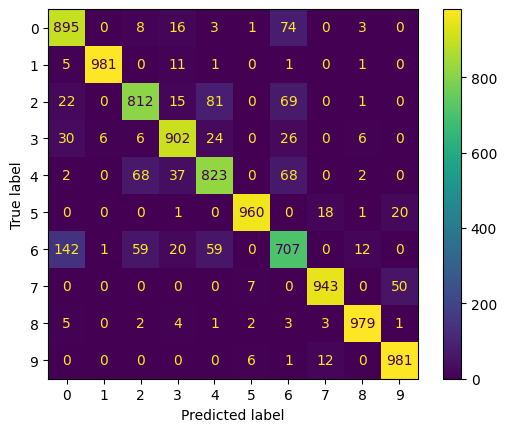

In [40]:
# Создаем словарь который будет содержать модель сети и параметры для обучения
models = dict()
models[0] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
]), tf.keras.optimizers.Adam(learning_rate=0.001), 250]
models[1] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='gelu', name='hiden_two'),
    keras.layers.Dense(64, activation='sigmoid', name='hiden_three'),
    keras.layers.Dense(64, activation='selu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
]), tf.keras.optimizers.AdamW(learning_rate=0.001), 450]

# Список для сохранения результатов
result = list()

# Формируем сеть
for key, param in models.items():
  # Загружаем параметры
  model, opt, batch = param[0], param[1], param[2]
  # Загружаем входные веса, чтобы хоть как-то "уравнять" результаты работы
  model.load_weights('fashion_weights.h5')
  model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  model.fit(train_images, train_labels, batch_size=batch, epochs=25, verbose=1)
  # Получаем предварительную метрику
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print('\nTest accuracy:', test_acc)
  probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
  # Сохраняем массив с вероятностями
  result.append(probability_model.predict(test_images))
# Получаем финишное предсказание суммируя два массива с вероятностями
y_pred = np.argmax(sum(result), axis=1)

ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [42]:
# Окончательная метрика качества
print(accuracy_score(test_labels, y_pred))

0.8983


In [43]:
# Распределение предсказаний по классам
print(recall_precision(test_labels, y_pred))

Класс - 0, точность - 0.813, полнота - 0.895
Класс - 1, точность - 0.993, полнота - 0.981
Класс - 2, точность - 0.850, полнота - 0.812
Класс - 3, точность - 0.897, полнота - 0.902
Класс - 4, точность - 0.830, полнота - 0.823
Класс - 5, точность - 0.984, полнота - 0.960
Класс - 6, точность - 0.745, полнота - 0.707
Класс - 7, точность - 0.966, полнота - 0.943
Класс - 8, точность - 0.974, полнота - 0.979
Класс - 9, точность - 0.933, полнота - 0.981
None


In [44]:
import numpy as np

def plot_image(i, predictions_array, true_label, img):
    # сопоставим правильные значения с картинками
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    # получим предсказанные знаечния
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        # если предсказанное значение верное, то цвет - синий
        color = 'blue'
    else:
        # если неверное, то - красный
        color = 'red'
    # формируем подпись
    plt.xlabel(f'{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}%  ({class_names[true_label]})', color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


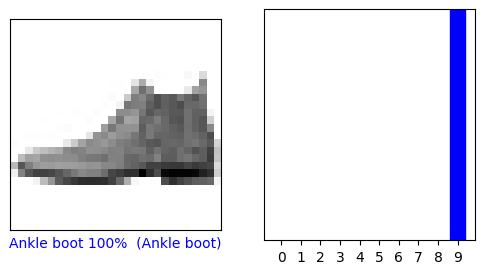

In [45]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

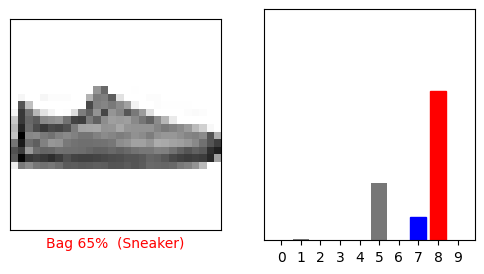

In [46]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


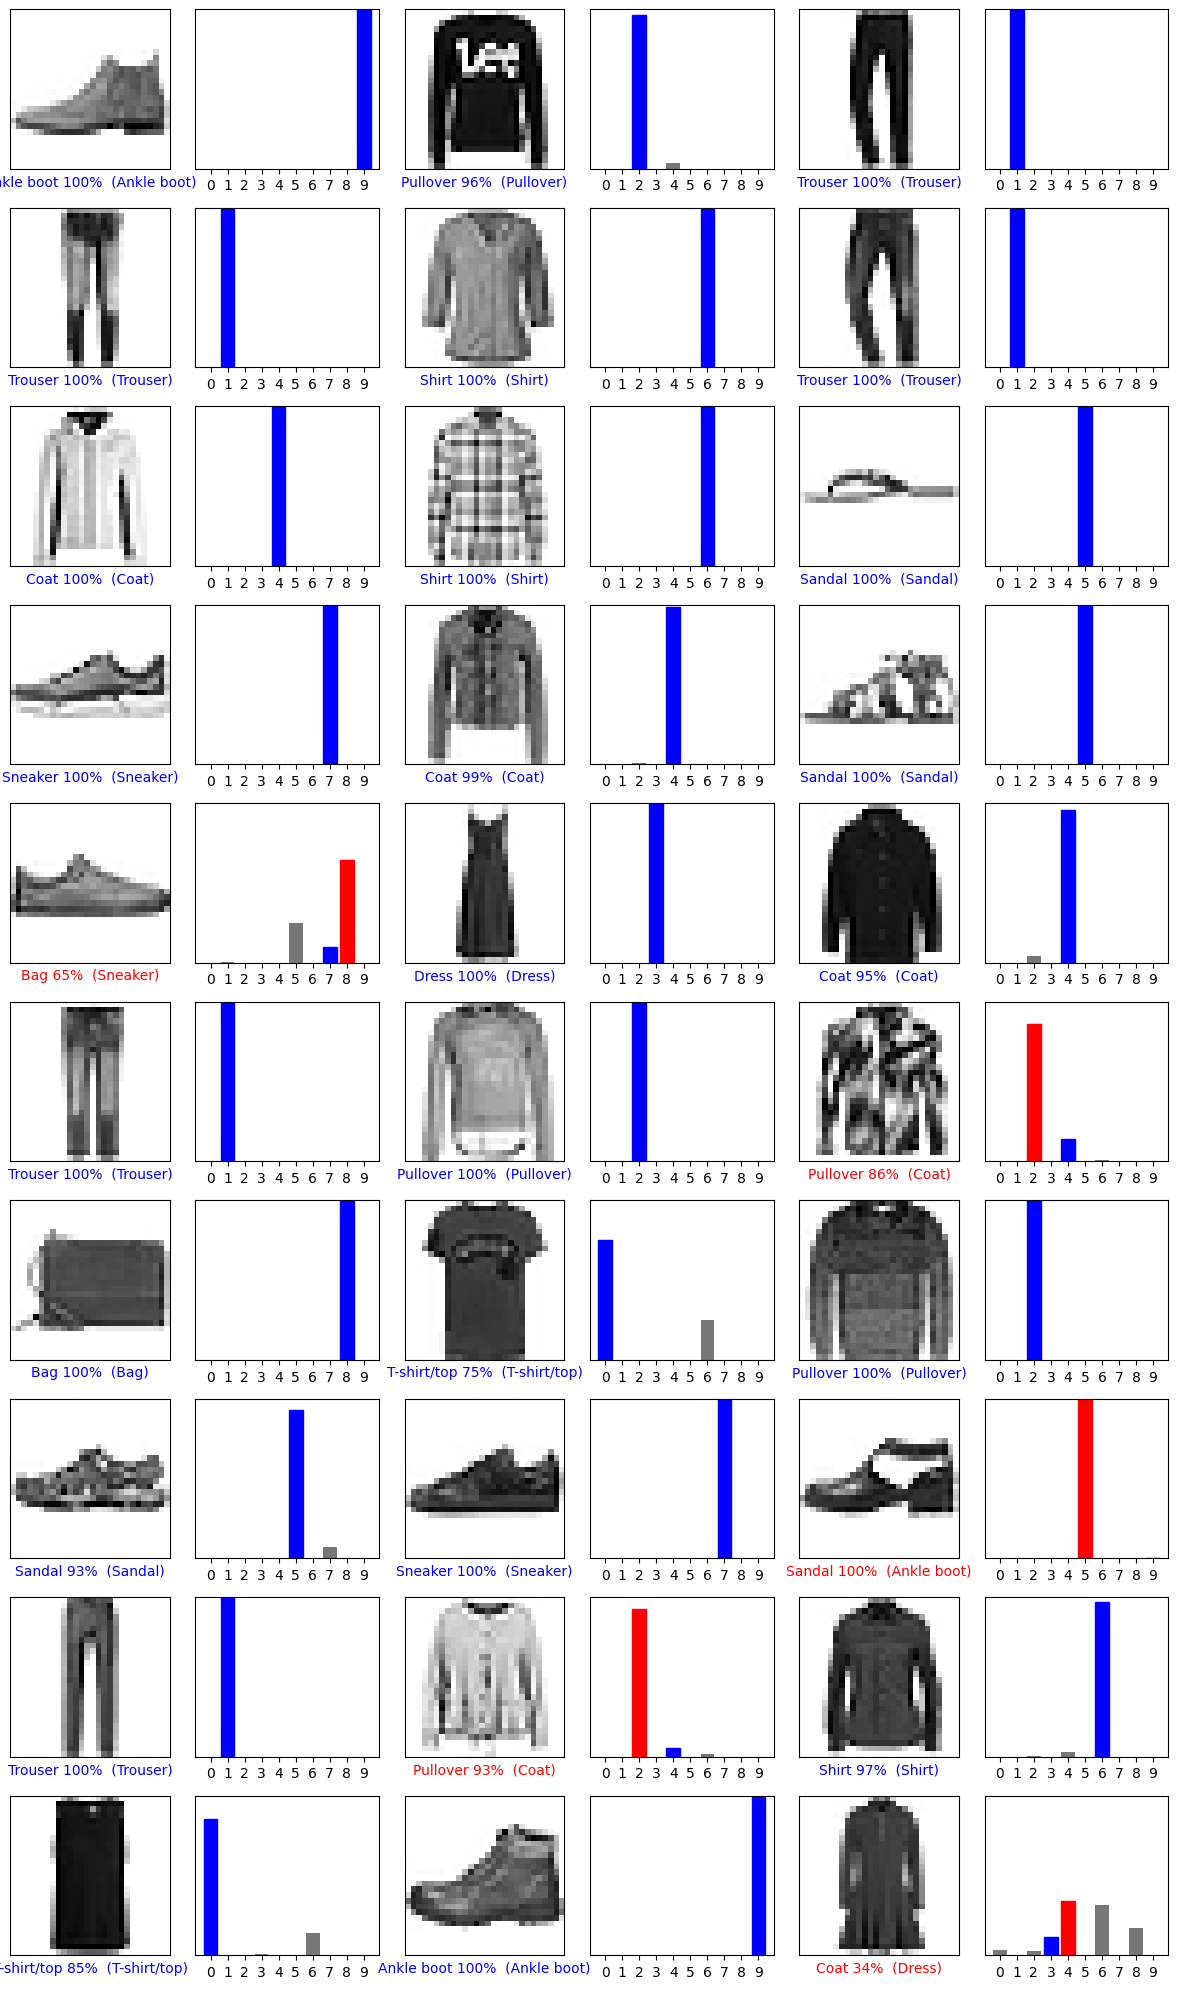

In [50]:
print(class_names)
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()